In [1]:
# Change to the desired directory
import os
from IPython import get_ipython

# Specify the target directory
target_dir = r"E:\Github\Pneumonia\Chest_X-Ray_Pneumonia_PyTorch"

# Use %cd to change directory
get_ipython().run_line_magic('cd', target_dir)

E:\Github\Pneumonia\Chest_X-Ray_Pneumonia_PyTorch


C:\Users\maraw\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


# Importing Libraries

In [2]:
import pandas as pd
import numpy as np 
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from glob import glob
from tqdm import tqdm


# Creating a datamap

## Data maps is just a DataFrame made up from all the data we have (pictures in our case)

In [3]:
paths = [r'data\chest_xray\test\NORMAL',
         r'data\chest_xray\test\PNEUMONIA',
         r'data\chest_xray\train\NORMAL',
         r'data\chest_xray\train\PNEUMONIA',
         r'data\chest_xray\val\NORMAL',
         r'data\chest_xray\val\PNEUMONIA']

# Create a list of all image paths and their corresponding classes and splits
# Initialize an empty list to store DataFrames
df_list = []

for path in paths:
    img_path = glob(path + r'\*.jpeg')
    clas = Path(path).name
    split = Path(path).parent.name
    print(f"Found {len(img_path)} images in: {path}")

    df_loop = pd.DataFrame({
        'img_path': img_path,
        'clas': clas,
        'split': split
    })
    # Append the DataFrame to the list
    df_list.append(df_loop)

# Concatenate all DataFrames in the list into a single DataFrame
df = pd.concat(df_list, ignore_index=True)    


Found 234 images in: data\chest_xray\test\NORMAL
Found 390 images in: data\chest_xray\test\PNEUMONIA
Found 1341 images in: data\chest_xray\train\NORMAL
Found 3875 images in: data\chest_xray\train\PNEUMONIA
Found 8 images in: data\chest_xray\val\NORMAL
Found 8 images in: data\chest_xray\val\PNEUMONIA


# Resizing our images so they are constant around 224x224 pixels

224x224 pixels is one of the default input sizes in most transform learning models

## Creaing a subplot to show the variations in our input sizes

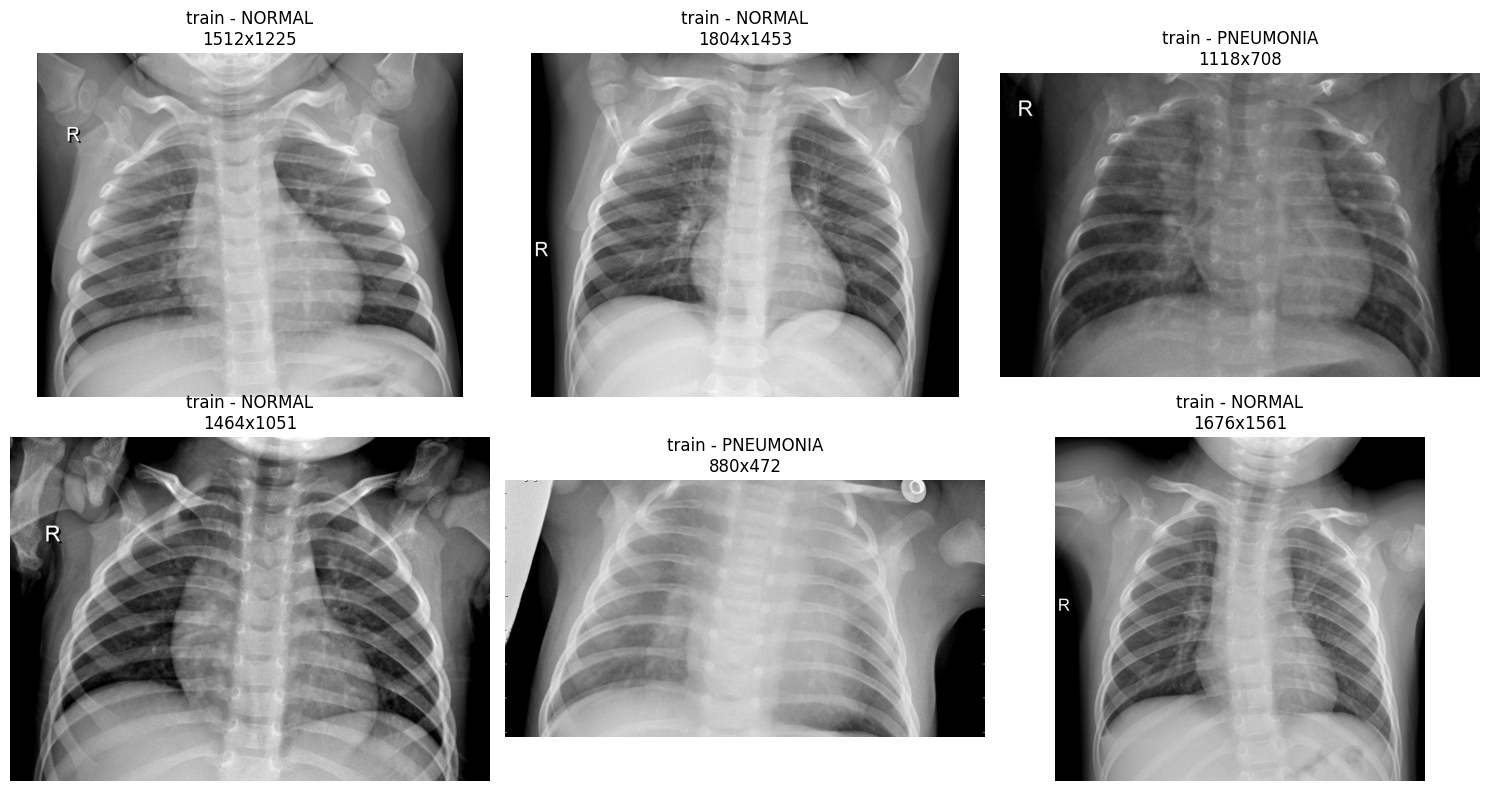

In [4]:
# Sample 6 random images from the DataFrame
sample_df = df.sample(6)

# Set up a subplot
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for ax, (_, row) in zip(axes.flatten(), sample_df.iterrows()):
    img = Image.open(row['img_path'])
    ax.imshow(img, cmap='gray')  # Chest X-rays are grayscale
    ax.set_title(f"{row['split']} - {row['clas']}\n{img.size[0]}x{img.size[1]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

## Resizing Process

In [5]:
# Parameters
resize_to = 256
crop_size = 224
base_output_dir = Path('data/chest_xray_resized')
base_output_dir.mkdir(parents=True, exist_ok=True)

# Resize & crop function
def resize_and_crop_center(image_path, resize_to, crop_size):
    img = Image.open(image_path).convert("L")
    img = img.resize((resize_to, resize_to))
    left = (resize_to - crop_size) // 2
    top = (resize_to - crop_size) // 2
    return img.crop((left, top, left + crop_size, top + crop_size))

# Store new paths
resized_paths = []

print("Resizing and cropping images...")
for i in tqdm(range(len(df))):
    original_path = Path(df.loc[i, 'img_path'])
    split = df.loc[i, 'split']
    clas = df.loc[i, 'clas']

    output_subdir = base_output_dir / split / clas
    output_subdir.mkdir(parents=True, exist_ok=True)

    new_filename = f"{original_path.stem}_resized{original_path.suffix}"
    new_path = output_subdir / new_filename

    img = resize_and_crop_center(original_path, resize_to, crop_size)
    img.save(new_path)

    resized_paths.append(str(new_path))

df['resized_path'] = resized_paths

Resizing and cropping images...


100%|██████████| 5856/5856 [01:20<00:00, 73.15it/s]


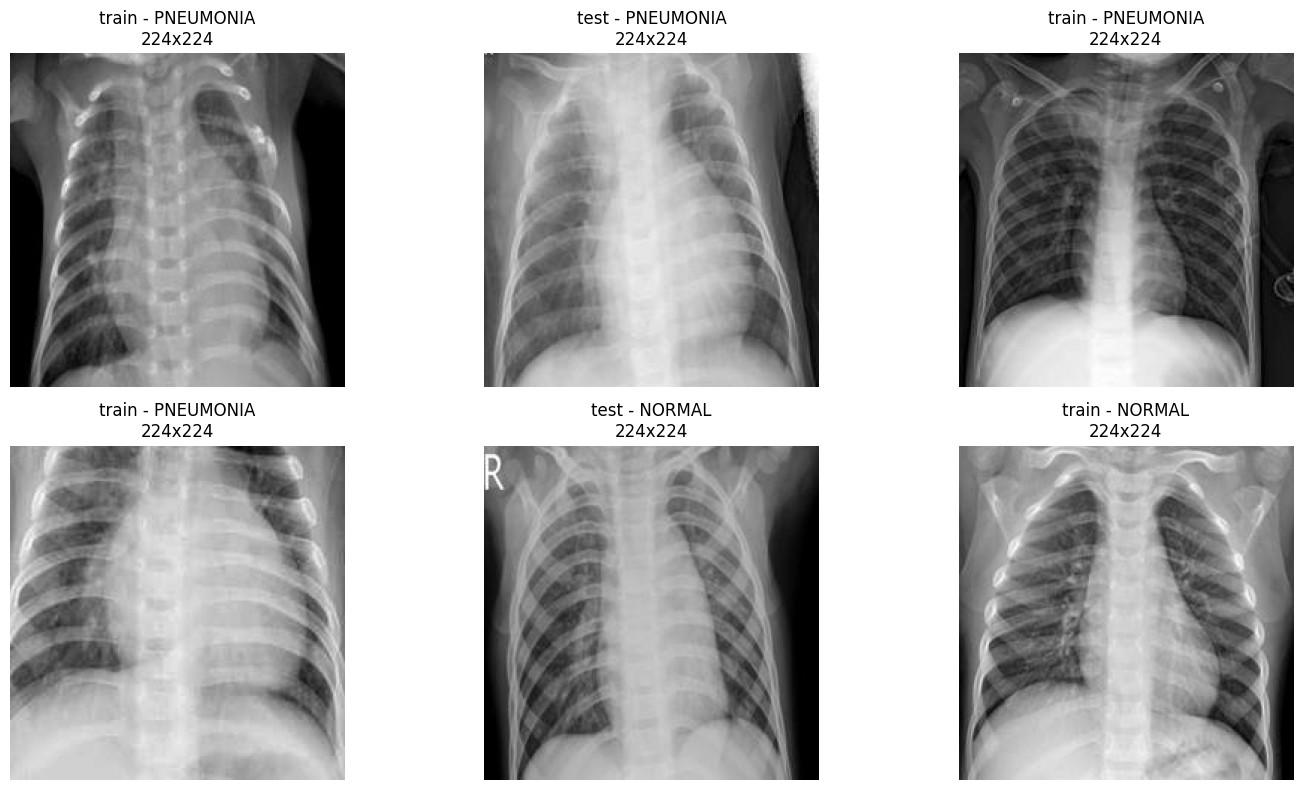

In [6]:
# Sample 6 random images from the DataFrame
sample_df = df.sample(6)

# Set up a subplot
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for ax, (_, row) in zip(axes.flatten(), sample_df.iterrows()):
    img = Image.open(row['resized_path'])
    ax.imshow(img, cmap='gray')  # Chest X-rays are grayscale
    ax.set_title(f"{row['split']} - {row['clas']}\n{img.size[0]}x{img.size[1]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

# Visualizing the images after resizing

# Saving the dataframe as a csv file

In [7]:
df.to_csv(r'df_resized.csv', index=False)